In [1]:
import sys
import os as os
sys.path.append(os.path.abspath(".."))
import numpy as np
import matplotlib.pyplot as plt
from utils import ISTA, IST


In [2]:
def ISTA_runs( runs, p, q, C, tau, lam, x_sparsity):
    #parameters definition with suggested settings
    q=q
    p=p

    x_tilda_supports = []
    x_estimated_supports = []
    num_iterations = []

    #running the simulation 20 times
    for _ in range(runs):        
        # generating x_tilda with n-sparsity
        x_tilda = np.zeros(p)
        x_tilda[np.random.choice(p, x_sparsity, replace=False)] = np.random.choice([-1, 1], 2) * np.random.uniform(1, 2)
        x_tilda_supports.append (np.where(x_tilda != 0)[0]) #real x_tilda support
        
        eta = 10**(-2) * np.random.randn(q)

        y = np.dot(C, x_tilda) + eta
        x_estimated, x_estimated_supp, iterations = ISTA(np.zeros(p),C,tau,lam,y)
        x_estimated_supports.append(x_estimated_supp)
        num_iterations.append(iterations)

    correct_estimations = 0
    for j in range(runs):
        if np.array_equal(x_tilda_supports[j], x_estimated_supports[j]):
            correct_estimations += 1
    return correct_estimations, num_iterations, x_estimated

## Question 1 and 3

In [3]:
q=10
p=20
C = np.random.randn(q, p)
C_l_2_norm = np.linalg.norm(C, ord=2)
tau = 1 / (C_l_2_norm**2) - 10**(-8)
lam = 1 / (100*tau)
sparsity = 2

runs = 1000

print("\nFIRST EXERCISE WITH SUGGESTED PARAMETERS (q=10, p=20)\n")

print("             QUESTION 1\n- Support recovery rate: how many times the support of x_tilda is correctly estimated?")
correct_estimations, num_iterations, _ = ISTA_runs(runs, p, q, C, tau, lam, sparsity)
print("The support of x_tilda is correctly estimated in ", correct_estimations, " out of", runs ," runs" , 
        "\nMin iterations = ", min(num_iterations), " || Max iterations = ", max(num_iterations), " || Mean Iterations = ", np.mean(num_iterations), "\n")


FIRST EXERCISE WITH SUGGESTED PARAMETERS (q=10, p=20)

             QUESTION 1
- Support recovery rate: how many times the support of x_tilda is correctly estimated?
The support of x_tilda is correctly estimated in  500  out of 1000  runs 
Min iterations =  94  || Max iterations =  271548  || Mean Iterations =  2124.642 



## Question 2

Analyzing correct estimation percentage for q varying from 10 to 50 with step 1

In [4]:
q_list = range(10, 51)
correct_estimations_percentage = []
max_iterations = []
min_iterations = []
mean_iterations = []

Simulation

In [ ]:
print("             QUESTION 2\n- Can we obtain 100% of success in the support recovery by increasing q?\n")
for q in q_list:
    C = np.random.randn(q, p)
    C_l_2_norm = np.linalg.norm(C, ord=2)
    tau = 1 / (C_l_2_norm**2) - 10**(-8)
    lam = 1 / (100*tau)
    correct_estimations, num_iterations, _ = ISTA_runs(runs, p, q, C, tau, lam, sparsity)
    correct_estimations_percentage.append(correct_estimations*100/runs)
    max_iterations.append(np.max(num_iterations))
    min_iterations.append(np.min(num_iterations))
    mean_iterations.append(np.mean(num_iterations))

             QUESTION 2
- Can we obtain 100% of success in the support recovery by increasing q?



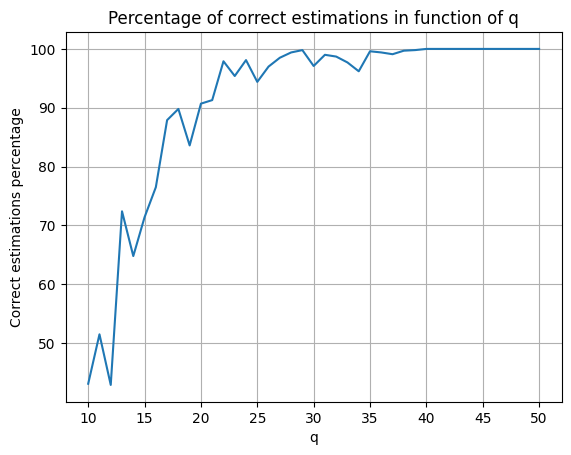

In [ ]:
#plotting correct estimations percentage
plt.plot(q_list, correct_estimations_percentage)
plt.xlabel("q")
plt.ylabel("Correct estimations percentage")
plt.title("Percentage of correct estimations in function of q")
plt.grid()
plt.show()

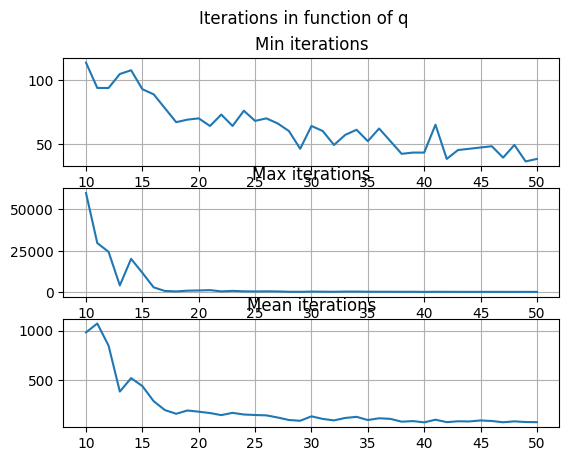

In [ ]:
#plotting min, max and mean iterations in 3 different lines
fig, axs = plt.subplots(3)
fig.suptitle('Iterations in function of q')
axs[0].plot(q_list, min_iterations)
axs[0].set_title('Min iterations')
axs[1].plot(q_list, max_iterations)
axs[1].set_title('Max iterations')
axs[2].plot(q_list, mean_iterations)
axs[2].set_title('Mean iterations')
axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.show()

## Question 4

To guarantee ISTA convergence, the step size must satisfy $\tau \leq \|C\|_2^2$.
In this experiment, we start with the suggested parameter values and progressively decrease $\tau$ by $0.001$ at each iteration. $\lambda$ is adjusted dynamically to keep the product $\tau\lambda$ constant throughout the sweep.

In [ ]:
print("             QUESTION 4\n q = 10 | Try different values for τ , by keeping τλ constant\n")

##### q = 10 ######
q = 10
tau_list = []
C = np.random.randn(q, p)
C_l_2_norm = np.linalg.norm(C, ord=2)
for i in range (0, 10):
    tau_list.append(1 / (C_l_2_norm**2) - 10**(-8) - i * 10**(-3))
correct_estimations_percentage = []
max_iterations = []
min_iterations = []
mean_iterations = []

for tau in tau_list:
    lam = 1 / (100 * tau)
    correct_estimations, num_iterations, _ = ISTA_runs(runs, p, q, C, tau, lam, sparsity)
    correct_estimations_percentage.append(correct_estimations*100/runs)
    max_iterations.append(np.max(num_iterations))
    min_iterations.append(np.min(num_iterations))
    mean_iterations.append(np.mean(num_iterations))
    print("tau = ", tau, "|| The support of x_tilda is correctly estimated in ", correct_estimations, " out of ", runs, " runs" , "\n")

In [ ]:
#plotting correct estimations percentage
plt.figure()
plt.ylim(0, 100)
plt.plot(tau_list, correct_estimations_percentage)
plt.gca().invert_xaxis()
plt.xlabel("tau")
plt.ylabel("Correct estimations percentage")
plt.title("q = 10 | Percentage of correct estimations in function of tau")
plt.grid()
plt.show()

In [ ]:
# plotting iterations
plt.figure()
plt.yscale('log')
plt.plot(tau_list, min_iterations, color='b', label="Min")
plt.plot(tau_list, max_iterations, color='g', label="Max")
plt.plot(tau_list, mean_iterations, color='m', label="Mean")
plt.gca().invert_xaxis()
plt.xlabel("tau")
plt.ylabel("Number of iterations")
plt.title("q = 10 | Convergence time in function of tau")
plt.legend()
plt.grid()
plt.show()


## Question 5

Using the same methodology, we analyze the impact of the regularization parameter. We decrease $\lambda$ by $0.01$ at each run.

In [ ]:
print("             QUESTION 5\nq=10 | Try different values for λ , by keeping τ constant\n")

q = 10

tau = 1 / (C_l_2_norm**2) - 10**(-8)
lam_list = []
for i in range(0, 10):
    lam_list.append(1 / (100*tau) - i * 10**(-2))

correct_estimations_percentage = []
max_iterations = []
min_iterations = []
mean_iterations = []

for lam in lam_list:
    correct_estimations, num_iterations, _ = ISTA_runs(runs, p, q, C, tau, lam, sparsity)
    correct_estimations_percentage.append(correct_estimations*100/runs)
    max_iterations.append(np.max(num_iterations))
    min_iterations.append(np.min(num_iterations))
    mean_iterations.append(np.mean(num_iterations))
    print("q=10 | lam = ", lam, "|| The support of x_tilda is correctly estimated in ", correct_estimations, " out of ", runs, " runs" , "\n")

In [ ]:
#plotting correct estimations percentage
plt.figure()
plt.ylim(0, 100)
plt.plot(lam_list, correct_estimations_percentage, color='r')
plt.gca().invert_xaxis()
plt.xlabel("lambda")
plt.ylabel("Correct estimations percentage")
plt.title("Percentage of correct estimations in function of lambda")
plt.grid()
plt.show()

In [ ]:
# plotting iterations
plt.figure()
plt.yscale('log')
plt.plot(lam_list, min_iterations, color='b', label="Min")
plt.plot(lam_list, max_iterations, color='g', label="Max")
plt.plot(lam_list, mean_iterations, color='m', label="Mean")
plt.gca().invert_xaxis()
plt.xlabel("lam")
plt.ylabel("Number of iterations")
plt.title("q = 10 | Convergence time in function of lambda")
plt.legend()
plt.grid()
plt.show()